# あやめの分類

In [19]:
import warnings

import numpy as np

warnings.filterwarnings("ignore")

## 1. 問題の定義

### 解くべき問題は何か？
- 3種類のアイリスの品種を予測すること

### 現状の予測手法はあるか？
- 図鑑を片手に実際の花をよく見て考える(目視)
    - これは非常に時間がかかる
    - 精度もあまりよくない
    
### どういう問題として処理するか？
- 教師あり学習
- 3クラス分類問題


## 2. データの取得・観察

In [20]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [21]:
# どういうデータなのかという情報がそもそも格納されている
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
# データの形状は .shape でアクセスできる
iris_dataset["data"].shape

(150, 4)

In [23]:
# クラスは3種類
iris_dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
# 0, 1, 2 のいずれかの値でクラスを表現している
# クラスのバランスは均衡
iris_dataset["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
# 形状を確認
iris_dataset["target"].shape

(150,)

## 3. 評価指標と評価プロトコル

### 評価指標
- クラスのバランスが均等なので、正答率(Accuracy)が妥当だろう


### 評価プロトコル
- データの量が多いわけではないので交差検証で行うべきだろう

### データを分割する

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset["data"],
    iris_dataset["target"],
    random_state=24
)

In [27]:
# 分割後の形状確認(学習データ)
X_train.shape, y_train.shape

((112, 4), (112,))

In [28]:
# 分割後の形状確認(テストデータ)
X_test.shape, y_test.shape

((38, 4), (38,))

## 4. データの前処理・特徴量エンジニアリング

### データの観察と研究
- いきなり機械学習モデル構築をするわけじゃあない


In [29]:
import pandas as pd

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset["feature_names"])

In [30]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.5,2.3,4.0,1.3
1,6.6,2.9,4.6,1.3
2,5.7,3.0,4.2,1.2
3,4.6,3.6,1.0,0.2
4,5.7,4.4,1.5,0.4


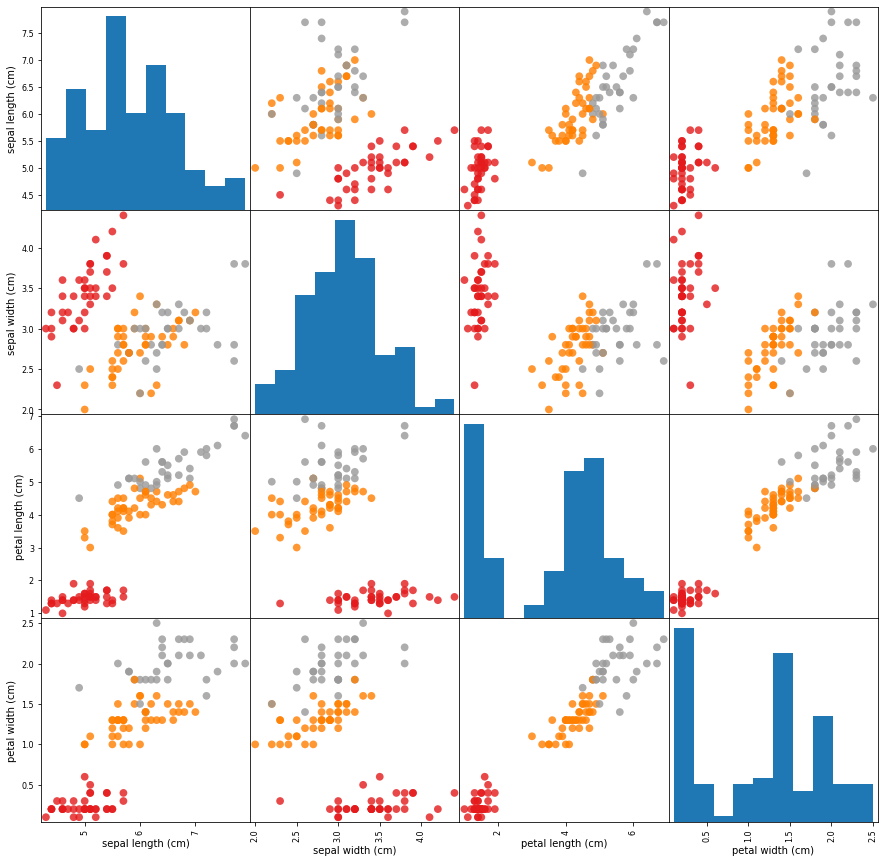

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline

grr = pd.plotting.scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15, 15),
    marker="o",
    s=60,
    alpha=0.8,
    cmap="Set1"
)

### 可視化してみてどうか？
- sepal(がく片) と petal(花弁) で結構分離できている気がする
- 品種を区別するための情報がこのデータに含まれていそう

### 前処理
- 今回は特に行わずに進める

### 特徴量エンジニアリング
- 現状の特徴量で分類ができそうなので、まずはそのままにして、モデルの訓練を進める

## 5. モデルの訓練・評価

### モデルの訓練 と モデルの評価
- 交差検証でモデルと評価を行う
- 機械学習アルゴリズムはいくつか試す    

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.neighbors import KNeighborsClassifier

cv_score_knn = cross_val_score(KNeighborsClassifier(
    n_neighbors=1), X_train, y_train, cv=5)

print(f"Avg score: {np.mean(cv_score_knn):.3f}")
print(f"Std: {cv_score_knn.std():.3f}")

Avg score: 0.946
Std: 0.034


In [34]:
from sklearn.linear_model import LogisticRegression

cv_score_logreg = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)


print(f"Avg score: {np.mean(cv_score_logreg):.3f}")
print(f"Std: {cv_score_logreg.std():.3f}")

Avg score: 0.953
Std: 0.043


### 6. モデルのチューニング
- LogisticRegressionの方が良さそうなので、ハイパーパラメータのチューニングを行う
- パラメータのチューニングにはグリッドサーチを使う

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.9642857142857143
{'C': 10}


### テストデータの最終的な評価
- この精度 94.7% が今回作成したモデルの性能ということになる
- これ以上のチューニングはしてはならない(情報が漏れるから)


In [36]:
grid.score(X_test, y_test)

0.9473684210526315